In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
#from matplotlib.cm import rainbow
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *

In [2]:
heartData=pd.read_csv("heart_failure.csv")


In [3]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heartData.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
missing_data=heartData.isnull().sum()
total_percentage=(missing_data.sum()/heartData.shape[0])*100
print(f'total percentage of missing data is {round(total_percentage,2)}%')
# Use duplicated() instead of duplicate() to find duplicate rows
duplicate=heartData[heartData.duplicated()] 
print("duplicate")

heartData=heartData.drop_duplicates()

total percentage of missing data is 0.0%
duplicate


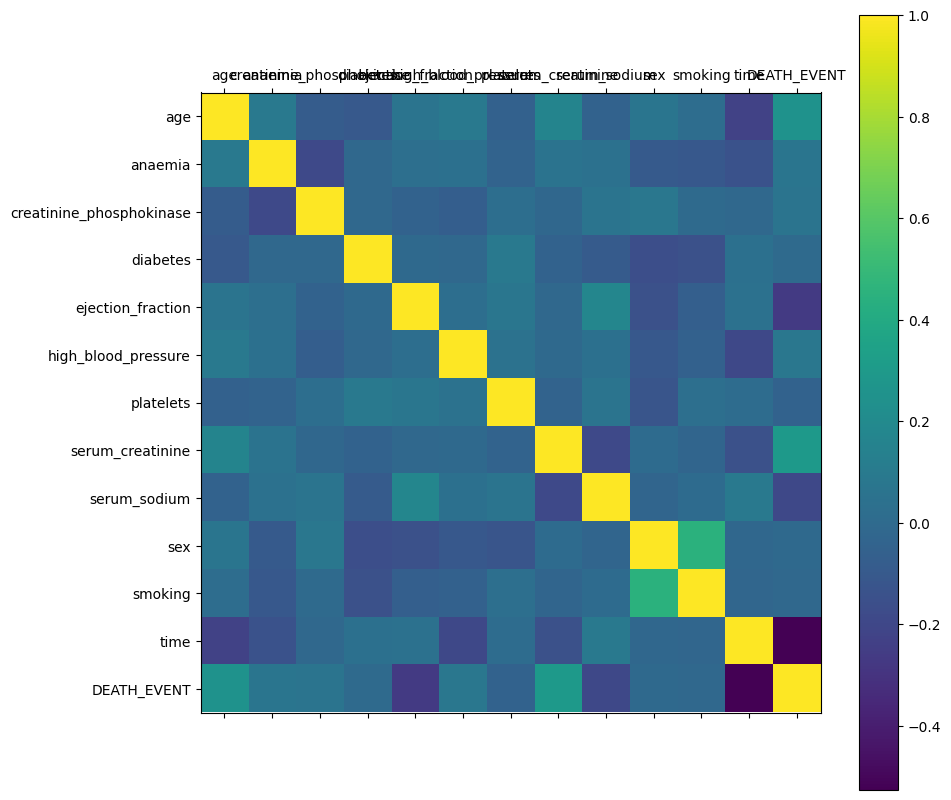

In [6]:
rcParams['figure.figsize'] = 10,10
plt.matshow(heartData.corr())
plt.yticks (np.arange(heartData.shape[1]), heartData.columns)
plt.xticks(np.arange(heartData.shape[1]), heartData.columns)
plt.colorbar()

In [7]:
corr = heartData.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [8]:
X = heartData.drop(['DEATH_EVENT'], axis = 1)
y= heartData['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
print("XTrain->", X_train.shape[0], "XTest->", X_test.shape[0], "YTrain->", y_train.shape[0], "XTrain->",y_test.shape[0])

XTrain-> 269 XTest-> 30 YTrain-> 269 XTrain-> 30


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(2,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train.values, y_train.values)
    knn_score=round(knn_classifier.score(X_test.values, y_test.values),2)
    knn_scores.append(knn_score)
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
knn_score=knn_classifier.predict(X_test)
print(classification_report(y_test,knn_score))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        20
           1       0.14      0.10      0.12        10

    accuracy                           0.50        30
   macro avg       0.38      0.40      0.38        30
weighted avg       0.45      0.50      0.47        30



Text(0.5, 1.0, 'KNN Scores for different & neighbouras')

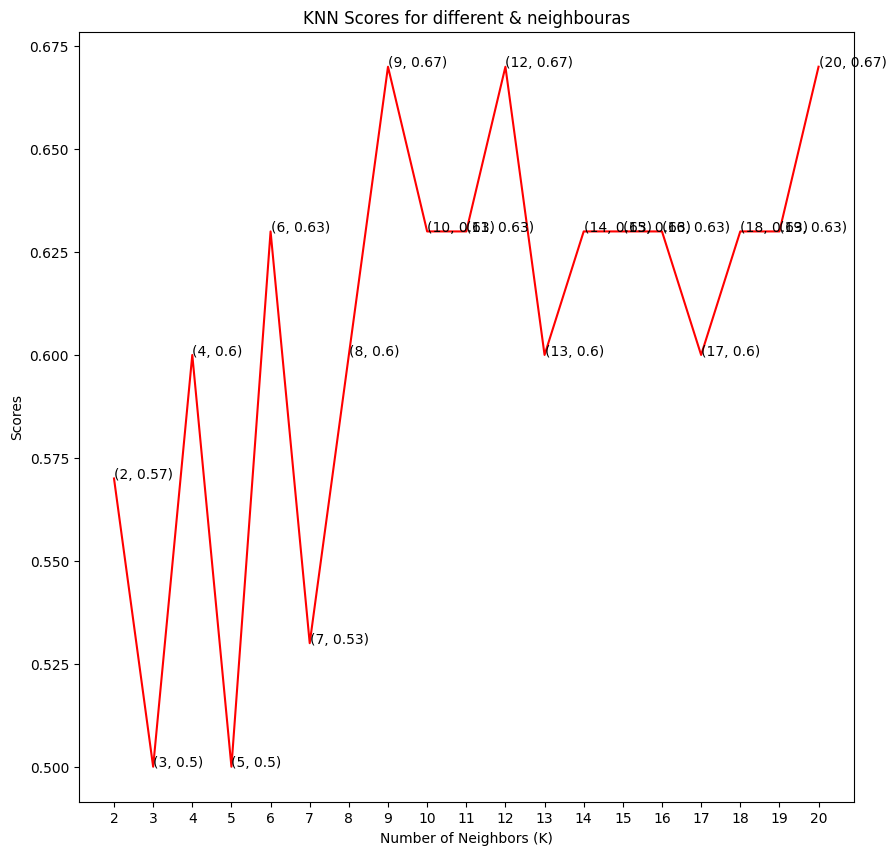

In [10]:
plt.plot([k for k in range(2, 21)],knn_scores, color='red')
for i in range(2,21):
  plt.text(i, knn_scores[i-2], (i, knn_scores[i-2]))
plt.xticks([i for i in range(2, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title("KNN Scores for different & neighbouras")

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC # Import SVC 
svc_scores = []
#V # Remove this line
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i]) # Indent this line
    svc_classifier.fit(X_train.values, y_train.values) # Indent this line
    svc_scores.append(round(svc_classifier.score(X_test.values, y_test.values),2)) # Indent this line
svc_classifier = SVC(kernel = kernels[0]) # Indent this line
svc_classifier.fit(X_train.values, y_train.values) # Indent this line
svc_prediction_result=svc_classifier.predict(X_test.values) # Indent this line
#print(svc_prediction_result) # Indent this line
print(accuracy_score(y_test.values, svc_prediction_result)) # Indent this line


0.8


In [ ]:
#from matplotlib.cm import rainbow
#plt.bar(kernels, svc_scores, color=colors)
#for i in range(len(kernels)):
  #  plt.text(i, svc_scores[i], svc_scores[i])
#plt.xlabel('Kernels')
#plt.ylabel('Scores')
#plt.title('SVM scores Activation function wise...')

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier=DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(X_test.values, y_test.values),2))
print("Done")

Done


In [13]:
print(dt_scores)


[0.63, 0.83, 0.83, 0.8, 0.7, 0.8, 0.77, 0.7, 0.7, 0.9, 0.83, 0.83]


In [14]:
dt_classifier = DecisionTreeClassifier(max_features=13, random_state = 0)
dt_classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

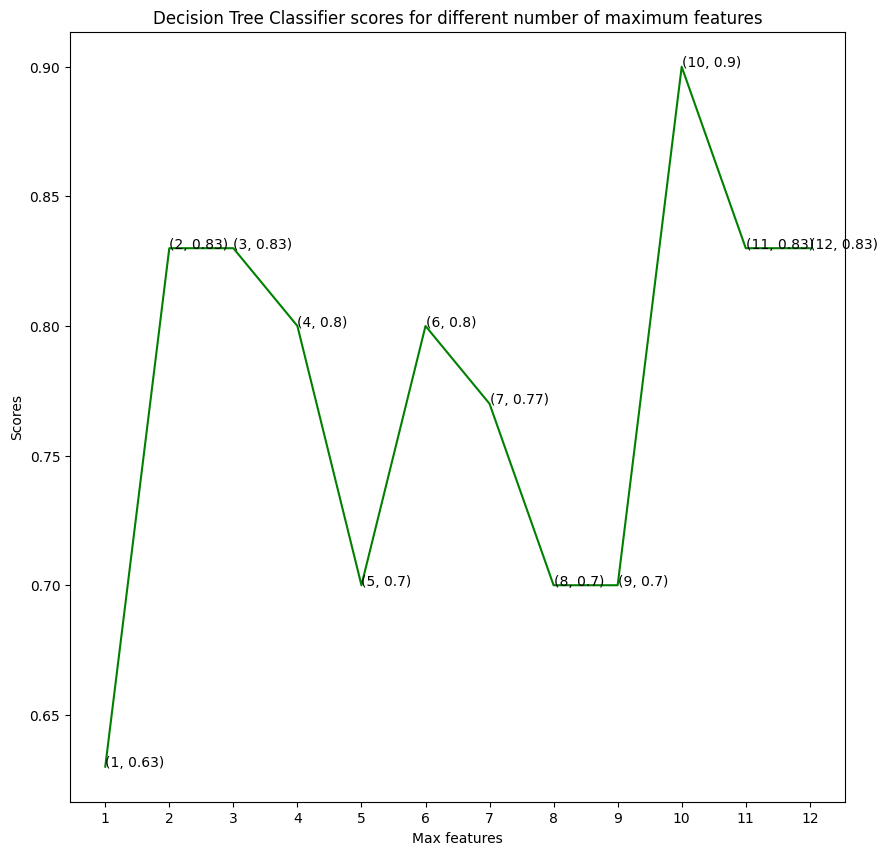

In [15]:
plt.plot([i for i in range(1, len(X.columns) +1)], dt_scores, color='green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len (X.columns) + 1)])
plt.xlabel("Max features")

plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [16]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

rf_scores = []
estimators = [10, 20, 100, 200, 500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0) # Assign the classifier to rf_classifier, add = to n_estimators
    rf_classifier.fit(X_train.values, y_train.values)
    rf_scores.append(round(rf_classifier.score(X_test.values, y_test.values), 2))

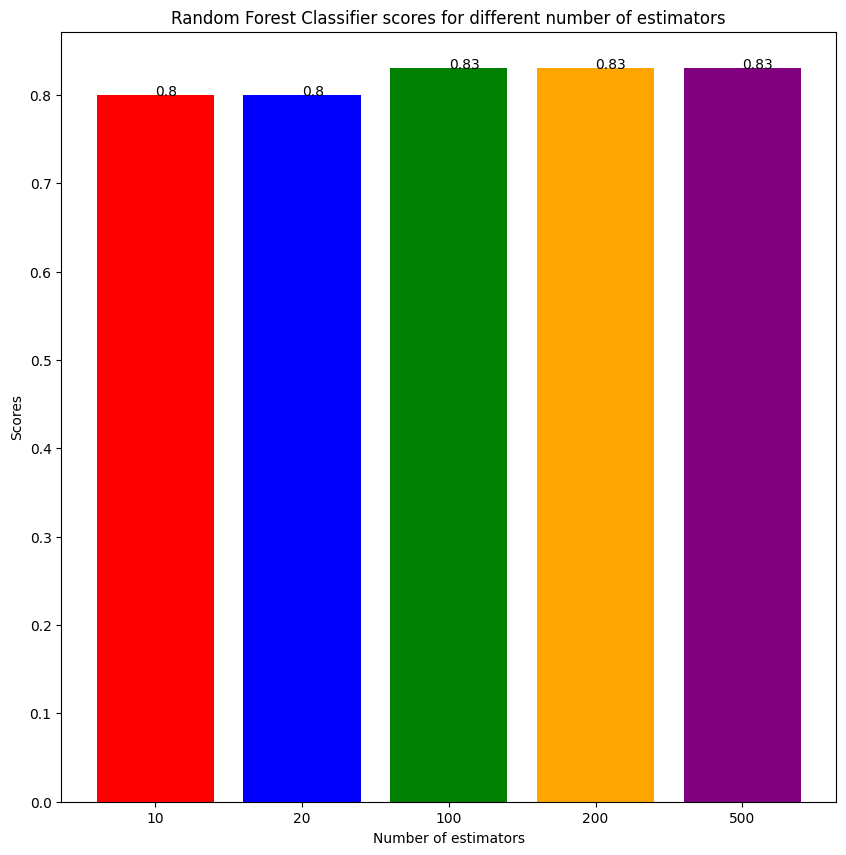

In [17]:
# Define the colors variable with a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Or any other color sequence you prefer
# Example: using rainbow colormap
# num_bars = len(estimators)
# colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width=0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel("Number of estimators")
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.show()  # Add plt.show() to display the plot

In [18]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression specifically

logistic_model = LogisticRegression()
logistic_model.fit(X_train.values, y_train.values)
logistic_model_prediction=logistic_model.predict(X_test.values)
print(accuracy_score(y_test.values, logistic_model_prediction))
print(classification_report(y_test.values, logistic_model_prediction))

0.8
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       1.00      0.40      0.57        10

    accuracy                           0.80        30
   macro avg       0.88      0.70      0.72        30
weighted avg       0.85      0.80      0.77        30



In [22]:
import pickle
# rf_model was not defined. Using rf_classifier instead.
all_models=[rf_classifier, logistic_model,dt_classifier, svc_classifier, knn_classifier]  
#pickle.dump(logistic_model, open("models.pkl", "wb"))
#pickle.dump(rf_classifier, open("models.pkl", "wb"))
with open("models.pkl", 'wb') as files:
      pickle.dump(all_models, files)
print("Done")

Done


In [21]:
open_file = open("models.pkl", "rb")
loaded_list= pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[RandomForestClassifier(n_estimators=500, random_state=0), LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='linear'), KNeighborsClassifier()]
Done
